# <center> Linear SVR

In [2]:
import numpy as np
import pandas as pd
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import random

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt

In [3]:
def mape(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) 

## Параметры

**epsilon** float, default=0.0
Epsilon parameter in the epsilon-insensitive loss function. Note that the value of this parameter depends on the scale of the target variable y. If unsure, set epsilon=0.

Ширина окна.

**tol** float, default=1e-4
Tolerance for stopping criteria.

Критерий остановки 

**C** float, default=1.0
Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

Порядок регуляризации.

**loss** {‘epsilon_insensitive’, ‘squared_epsilon_insensitive’}, default=’epsilon_insensitive’
Specifies the loss function. The epsilon-insensitive loss (standard SVR) is the L1 loss, while the squared epsilon-insensitive loss (‘squared_epsilon_insensitive’) is the L2 loss.

Функция потерь регуляризации.

**fit_intercept** bool, default=True
Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (i.e. data is expected to be already centered).

**intercept_scaling** float, default=1.
When self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic feature weight Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

**dual** bool, default=True
Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

**verbose** int, default=0
Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in liblinear that, if enabled, may not work properly in a multithreaded context.

**random_state** int or RandomState instance, default=None
Controls the pseudo random number generation for shuffling the data. Pass an int for reproducible output across multiple function calls. See Glossary.

Порядок последовательности случайных чисел.

**max_iter** int, default=1000
The maximum number of iterations to be run.

Максимальное количество итераций.

## Пример 1

In [10]:
X = np.random.random(100) * 2 * np.pi

In [11]:
y = np.array(list(map(lambda x: np.sin(x) + random.random(), X)))

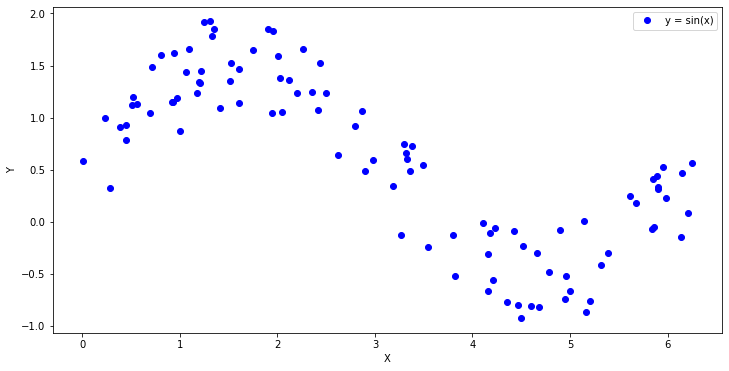

In [12]:
plt.figure(figsize = (12, 6))
plt.plot(X, y, 'bo')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['y = sin(x)'])
plt.show()

In [13]:
model = LinearSVR()
model.fit(X.reshape(-1, 1), y)
model.score(X.reshape(-1, 1), y)

0.534647813044981

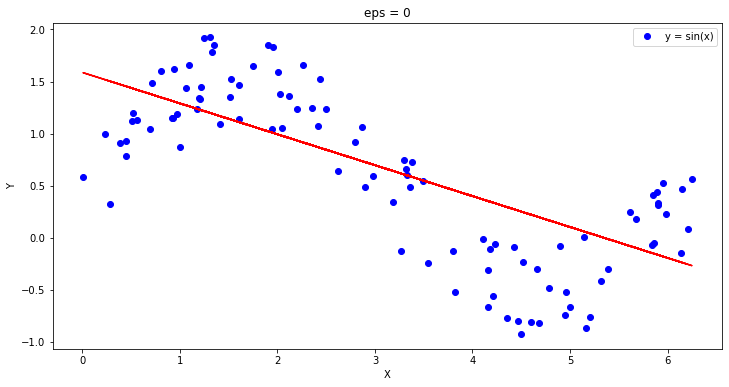

In [14]:
plt.figure(figsize = (12, 6))
plt.plot(X, y, 'bo')
plt.plot(X, model.predict(X.reshape(-1, 1)), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('eps = 0')
plt.legend(['y = sin(x)'])
plt.show()

In [15]:
model = SVR()
model.fit(X.reshape(-1, 1), y)
model.score(X.reshape(-1, 1), y)

0.880283662153441

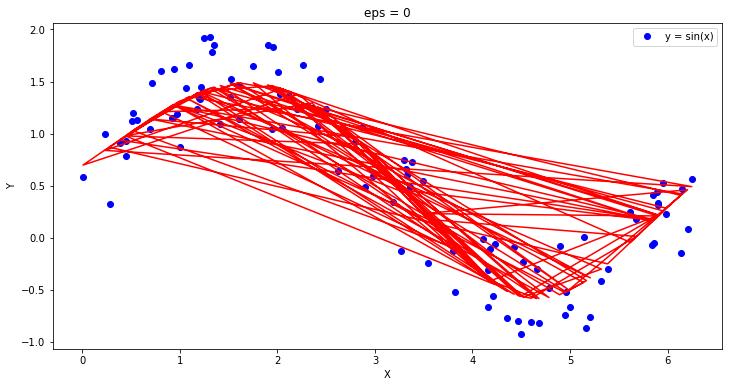

In [16]:
plt.figure(figsize = (12, 6))
plt.plot(X, y, 'bo')
plt.plot(X, model.predict(X.reshape(-1, 1)), 'r')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('eps = 0')
plt.legend(['y = sin(x)'])
plt.show()

In [76]:
model = LinearSVR(epsilon = 0.5)
model.fit(X.reshape(-1, 1), y)
model.score(X.reshape(-1, 1), y)

0.5395282488845818

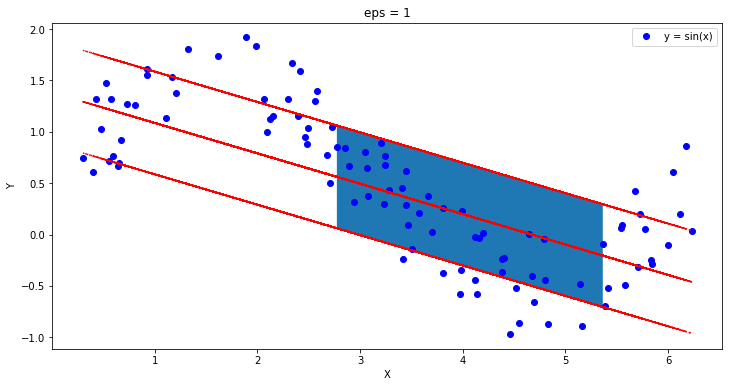

In [81]:
plt.figure(figsize = (12, 6))
plt.plot(X, y, 'bo')
plt.plot(X, model.predict(X.reshape(-1, 1)), 'r')
plt.plot(X, model.predict(X.reshape(-1, 1)) + 0.5, 'r:')
plt.plot(X, model.predict(X.reshape(-1, 1)) - 0.5, 'r:')
plt.fill_between(X, model.predict(X.reshape(-1, 1)) - 0.5, model.predict(X.reshape(-1, 1)) + 0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('eps = 1')
plt.legend(['y = sin(x)'])
plt.show()

In [84]:
model = LinearSVR(epsilon = 1.0)
model.fit(X.reshape(-1, 1), y)
model.score(X.reshape(-1, 1), y)

0.48389086376916857

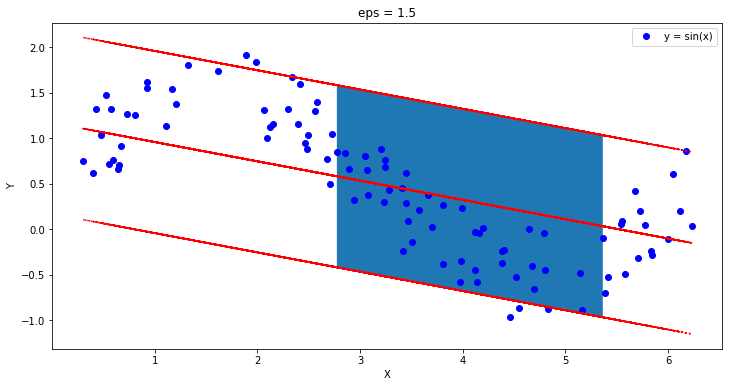

In [85]:
plt.figure(figsize = (12, 6))
plt.plot(X, y, 'bo')
plt.plot(X, model.predict(X.reshape(-1, 1)), 'r')
plt.plot(X, model.predict(X.reshape(-1, 1)) + 1.0, 'r:')
plt.plot(X, model.predict(X.reshape(-1, 1)) - 1.0, 'r:')
plt.fill_between(X, model.predict(X.reshape(-1, 1)) - 1.0, model.predict(X.reshape(-1, 1)) + 1.0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('eps = 1.5')
plt.legend(['y = sin(x)'])
plt.show()

## Пример 2

Рассмотрим набор данных: https://www.kaggle.com/quantbruce/real-estate-price-prediction

In [23]:
data = pd.read_csv('Real estate.csv', index_col = 0)
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,,,,,,,
1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [91]:
data.shape

(414, 7)

In [101]:
y = data['Y house price of unit area'].values
X = data.drop(columns = ['Y house price of unit area']).values

Разделим на **train** и **test**:

In [132]:
X_train = X[:350]
y_train = y[:350]
X_test = X[350:]
y_test = y[350:]

In [143]:
model = LinearSVR(epsilon = 0, max_iter=10000)
model.fit(X_train, y_train)
print(f" MSE test: \t{mean_squared_error(model.predict(X_test), y_test)}")
print(f" MAPE test: \t{mape(model.predict(X_test), y_test)}")
print(f" MAPE train: \t{mape(model.predict(X_train), y_train)}")

 MSE test: 	62.060187873120164
 MAPE test: 	0.1716571722043067
 MAPE train: 	0.5871061995422219


In [144]:
model = LinearSVR(epsilon = 1, max_iter=10000)
model.fit(X_train, y_train)
print(f" MSE test: \t{mean_squared_error(model.predict(X_test), y_test)}")
print(f" MAPE test: \t{mape(model.predict(X_test), y_test)}")
print(f" MAPE train: \t{mape(model.predict(X_train), y_train)}")

 MSE test: 	60.4277979827106
 MAPE test: 	0.17862690542256773
 MAPE train: 	0.3317963883808188


In [145]:
model = LinearSVR(epsilon = 2, max_iter=10000)
model.fit(X_train, y_train)
print(f" MSE test: \t{mean_squared_error(model.predict(X_test), y_test)}")
print(f" MAPE test: \t{mape(model.predict(X_test), y_test)}")
print(f" MAPE train: \t{mape(model.predict(X_train), y_train)}")

 MSE test: 	94.76463126028648
 MAPE test: 	0.21042025914670837
 MAPE train: 	0.3863064210571679


In [151]:
model = LinearSVR(epsilon = 5, loss="squared_epsilon_insensitive", max_iter=10000)
model.fit(X_train, y_train)
print(f" MSE test: \t{mean_squared_error(model.predict(X_test), y_test)}")
print(f" MAPE test: \t{mape(model.predict(X_test), y_test)}")
print(f" MAPE train: \t{mape(model.predict(X_train), y_train)}")

 MSE test: 	71.96891093956336
 MAPE test: 	0.17952264818808733
 MAPE train: 	0.19404961970025028


In [172]:
made_eps = []
for eps in range(0, 300, 5):
    model = LinearSVR(epsilon = eps, loss="squared_epsilon_insensitive", max_iter=10000)
    model.fit(X_train, y_train)
    made_eps.append(mape(model.predict(X_test), y_test))

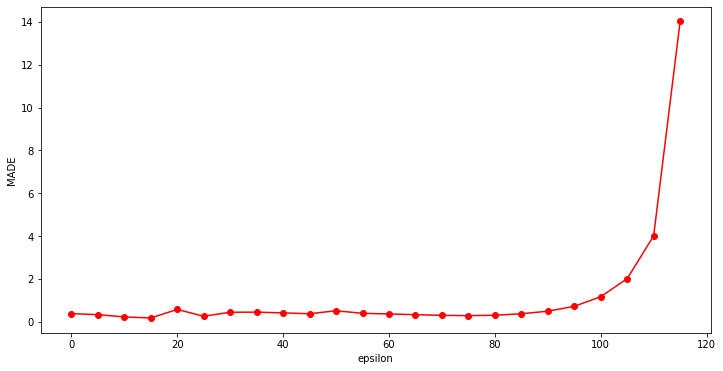

In [175]:
plt.figure(figsize = (12, 6))
plt.plot(list(range(0, 300, 5)), made_eps, 'ro')
plt.plot(list(range(0, 300, 5)), made_eps, 'r')
plt.xlabel('epsilon')
plt.ylabel('MADE')
plt.show()

In [177]:
# mse_eps = []
# for eps in range(0, 1000, 20):
#     model = LinearSVR(epsilon = eps, loss="squared_epsilon_insensitive", max_iter=10000)
#     model.fit(X_train, y_train)
#     mse_eps.append(mean_squared_error(model.predict(X_test), y_test))

In [179]:
# plt.figure(figsize = (12, 6))
# plt.plot(list(range(0, 1000, 20)), mse_eps, 'ro')
# plt.plot(list(range(0, 1000, 20)), mse_eps, 'r')
# plt.xlabel('epsilon')
# plt.ylabel('MSE')
# plt.show()